# AE 598 RL Homework 2

In [1]:
# general packages
import gym
import gym_gridworld
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. SARSA with epsilon-greedy policy
See Sutton and Barto 6.4

In [2]:
from tablemethodsrl import Sarsa

### Standard grid-world

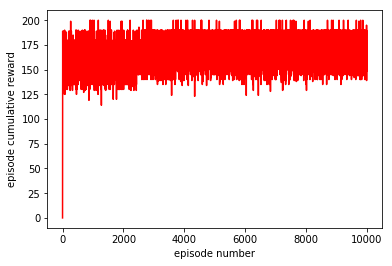

array([[ 0.7931836 ,  1.54210284, -0.01292467, -0.03038149],
       [ 2.37105796,  1.05293867,  0.5422291 ,  0.99486286],
       [ 1.59884256,  0.42711563, -0.02395302,  0.80999961],
       [ 1.47804331,  0.04834677, -0.01723798,  0.11252108],
       [ 0.9442078 , -0.13081803, -0.07278842,  0.09308046],
       [ 2.2751195 ,  1.40330266,  0.59494112,  0.25363899],
       [ 3.58824353,  1.60936919,  1.51085712,  1.52639729],
       [ 2.39888869,  1.17669174,  0.82775228,  1.82860576],
       [ 2.26627376,  0.57535185,  0.45564266,  0.8576038 ],
       [ 1.50271564, -0.02382928,  0.09291636,  0.46886356],
       [ 2.5845959 ,  3.4522393 ,  1.19395439,  1.01525205],
       [ 5.25240406,  2.41067222,  2.30513678,  2.28395317],
       [ 3.52264304,  2.21717378,  1.45069597,  3.39755319],
       [ 3.39144806,  1.53168168,  1.52880623,  2.38641783],
       [ 2.20750591,  0.24373604,  0.58113211,  1.66497329],
       [ 5.22198371,  3.15583591,  1.40201922,  1.45245448],
       [ 7.96800672,  3.

In [12]:
LEARNING_RATE = .01  # smaller values learn slower
REWARD_DECAY = .7  # smaller values care more about future rewards
EPS = .1  # smaller values are greedier

gw_env = gym.make('GridWorld-v0')
agent = Sarsa(gw_env, LEARNING_RATE, REWARD_DECAY, EPS)

episodes_num = 10000
episode_length = 100
all_cum_rewards = np.array(0)
for episode in range(episodes_num):
    # initialize each episode
    s = gw_env.reset()
    a = agent.choose_action(s)

    episode_cum_reward = agent.train(s, a, episode_length, False)

    all_cum_rewards = np.append(all_cum_rewards, episode_cum_reward)

all_cum_rewards = all_cum_rewards[0:-1]
plt.plot(range(episodes_num), all_cum_rewards, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

agent.q_table

### Hard grid-world

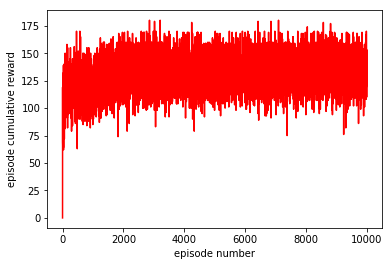

array([[ 1.06360092,  0.86735711, -0.3134074 , -0.34028124],
       [ 1.54810233,  0.72274185,  0.08262474,  0.67901452],
       [ 1.1275884 ,  0.58883124, -0.2299883 ,  0.96556849],
       [ 1.02759043,  0.20120065, -0.24897138,  0.44524854],
       [ 0.59761645, -0.26516215, -0.32267034,  0.21105203],
       [ 1.78857599,  1.61796915,  0.64926775,  0.22837962],
       [ 2.58202971,  1.29331042,  1.04026588,  1.17726061],
       [ 1.86821029,  1.13796841,  0.76742796,  1.59698415],
       [ 1.70655262,  0.65173134,  0.67976394,  1.15781361],
       [ 0.75413041, -0.21886264,  0.22976558,  1.0729913 ],
       [ 2.82396057,  2.79456648,  1.28657847,  1.02350639],
       [ 4.32202811,  2.0165495 ,  1.76083522,  1.90594033],
       [ 2.85163998,  1.83691689,  1.31082573,  2.72145354],
       [ 2.8708971 ,  1.20441317,  1.17585125,  1.8756224 ],
       [ 1.81945721,  0.14431215,  0.64234858,  1.59405072],
       [ 4.47701617,  4.32249459,  1.99068253,  2.15882507],
       [ 7.39050375,  3.

In [7]:
LEARNING_RATE = .01  # smaller values learn slower
REWARD_DECAY = .7  # smaller values care more about future rewards
EPS = .2  # smaller values are greedier

gw_env = gym.make('GridWorldHard-v0')
agent = Sarsa(gw_env, LEARNING_RATE, REWARD_DECAY, EPS)

episodes_num = 10000
episode_length = 100
all_cum_rewards = np.array(0)
for episode in range(episodes_num):
    # initialize each episode
    s = gw_env.reset()
    a = agent.choose_action(s)

    episode_cum_reward = agent.train(s, a, episode_length, False)

    all_cum_rewards = np.append(all_cum_rewards, episode_cum_reward)

all_cum_rewards = all_cum_rewards[0:-1]
plt.plot(range(episodes_num), all_cum_rewards, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

agent.q_table

## 2. Q-Learning
See Sutton and Barto 6.5

In [13]:
from tablemethodsrl import QLearning

### Standard grid-world

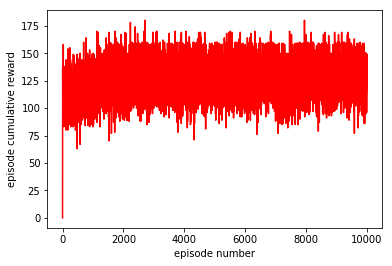

array([[12.62370948, 12.67982157, 10.52649375, 10.57809447],
       [14.32255226, 11.49464242, 11.81786254, 11.37841111],
       [12.80843639, 10.31762722, 10.3572581 , 12.68812273],
       [11.53737881,  6.7824003 ,  7.25611638,  9.21887494],
       [10.44305238,  3.19506955,  3.33997198,  5.26219154],
       [14.33820391, 14.20180966, 11.50665114, 12.01026271],
       [16.08813467, 12.71359477, 12.72449101, 12.69694467],
       [14.19676505, 11.52863746, 11.40048787, 14.30272928],
       [12.70613894, 10.41070449, 10.17958111, 12.74167644],
       [ 9.20360168,  7.58243916,  6.61992275, 11.62325334],
       [16.1228584 , 15.88712833, 12.87308041, 13.46048557],
       [18.21499882, 14.28954334, 14.39382248, 14.26808835],
       [15.90967925, 12.85366279, 12.82341005, 16.14289946],
       [14.53289274, 11.65414671, 11.534131  , 14.32439069],
       [12.08973144, 10.0405233 ,  9.39305318, 13.00255846],
       [18.14282797, 17.62612768, 14.49364372, 15.25485814],
       [20.41556695, 16.

In [16]:
LEARNING_RATE = .01  # smaller values learn slower
REWARD_DECAY = .9  # smaller values care more about future rewards
EPS = .3  # small values are greedier

gw_env = gym.make('GridWorld-v0')
agent = QLearning(gw_env, LEARNING_RATE, REWARD_DECAY, EPS)

episodes_num = 10000
episode_length = 100
all_cum_rewards = np.array(0)
for episode in range(episodes_num):
    # initialize each episode
    s = gw_env.reset()

    episode_cum_reward = agent.train(s, episode_length, False)

    all_cum_rewards = np.append(all_cum_rewards, episode_cum_reward)

all_cum_rewards = all_cum_rewards[0:-1]
plt.plot(range(episodes_num), all_cum_rewards, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

agent.q_table

### Hard grid-world

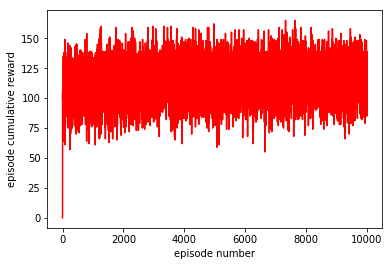

array([[11.17018357, 10.86768958,  9.13400202,  9.16326643],
       [12.68776066, 10.18482706, 10.145779  , 10.05798041],
       [11.29226392,  8.97716336,  8.94037641, 10.80101623],
       [10.02426978,  7.68720537,  7.73647687,  9.5101066 ],
       [ 5.58010431,  3.92658424,  3.83322975,  8.88991661],
       [12.82379661, 12.52996249, 10.11845185, 10.52334448],
       [14.32031405, 11.57383382, 11.24929477, 11.34369838],
       [12.68509308, 10.28825787, 10.07215355, 12.39339585],
       [11.41210367,  9.01354656,  9.08627224, 11.14936778],
       [ 7.41382173,  6.28392751,  6.36870619,  9.99602345],
       [14.32451343, 14.3570752 , 11.53061545, 12.04363084],
       [15.85149601, 13.11741344, 12.63522182, 12.75781603],
       [14.46372921, 11.66187204, 11.54821421, 14.20009589],
       [12.82851224, 10.36238866, 10.27191027, 12.57498161],
       [11.10367693,  8.86627749,  8.58518955, 11.46759612],
       [16.34368538, 15.8449986 , 12.8818591 , 13.80893007],
       [18.47232035, 14.

In [17]:
LEARNING_RATE = .01  # smaller values learn slower
REWARD_DECAY = .9  # smaller values care more about future rewards
EPS = .3  # small values are greedier

gw_env = gym.make('GridWorldHard-v0')
agent = QLearning(gw_env, LEARNING_RATE, REWARD_DECAY, EPS)

episodes_num = 10000
episode_length = 100
all_cum_rewards = np.array(0)
for episode in range(episodes_num):
    # initialize each episode
    s = gw_env.reset()

    episode_cum_reward = agent.train(s, episode_length, False)

    all_cum_rewards = np.append(all_cum_rewards, episode_cum_reward)

all_cum_rewards = all_cum_rewards[0:-1]
plt.plot(range(episodes_num), all_cum_rewards, 'r')
plt.ylabel('episode cumulative reward')
plt.xlabel('episode number')
plt.show()

agent.q_table